### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# 2. Linear Regression

### Outliers Included, Categories Balanced

#### Audrey Hughes Rager
#### December 30, 2020


## Import Packages

In [128]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

#Import Imbalanced Learn
from imblearn.over_sampling import RandomOverSampler

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [129]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")
df = df.rename({'fixed acidity': 'fixed_acidity','volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar':'residual_sugar',  'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide'}, axis=1)

df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [130]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [131]:
sm.__version__

'0.12.0'

## Model 1


In [132]:
#Create y and X datasets for this model
ym1 = df.quality
Xm1 = df.drop(['quality'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm1_resampled, ym1_resampled = ros.fit_resample(Xm1, ym1)
from collections import Counter
print(sorted(Counter(ym1_resampled).items()))

from sklearn.model_selection import train_test_split
Xm1_train, Xm1_test, ym1_train, ym1_test = train_test_split(Xm1_resampled, ym1_resampled, test_size=0.25, random_state=101)
Xm1_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3593,5.6,0.28,0.28,4.2,0.044,52.0,158.0,0.99200,3.35,0.44,10.7
7522,6.9,0.20,0.34,1.9,0.043,25.0,136.0,0.99350,3.31,0.60,10.1
5072,6.9,0.39,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.6
6514,6.8,0.26,0.34,15.1,0.060,42.0,162.0,0.99705,3.24,0.52,10.5
6587,7.1,0.49,0.22,2.0,0.047,146.5,307.5,0.99240,3.24,0.37,11.0


In [133]:
Xm1_train.shape

(11539, 11)

In [134]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(Xm1_train,ym1_train)
print('Estimated intercept coefficient:',lm1.intercept_)
print ('Number of coefficients:', len(lm1.coef_))
coeffm1_df = pd.DataFrame(lm1.coef_,Xm1.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: 595.8215919582422
Number of coefficients: 11


,Coefficient
fixed_acidity,0.425661
volatile_acidity,-2.592379
citric_acid,1.401246
residual_sugar,0.284004
chlorides,-3.399537
free_sulfur_dioxide,-0.006009
total_sulfur_dioxide,0.000751
density,-609.879076
pH,3.504269
sulphates,1.811749


In [135]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym1, Xm1 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm1 = pd.DataFrame()
vifm1['VIF'] = [variance_inflation_factor(Xm1.values, i) for i in range(Xm1.shape[1])]
vifm1['variable'] = Xm1.columns

#view VIF for each explanatory variable 
vifm1

,VIF,variable
0,3.067856e+06,Intercept
1,2.691435e+00,fixed_acidity
2,1.141156e+00,volatile_acidity
3,1.165215e+00,citric_acid
4,1.264406e+01,residual_sugar
5,1.236822e+00,chlorides
6,1.787880e+00,free_sulfur_dioxide
7,2.239233e+00,total_sulfur_dioxide
8,2.823255e+01,density
9,2.196362e+00,pH


In [136]:
predictions_m1 = lm1.predict(Xm1_test)

**Predicted vs. Actual**

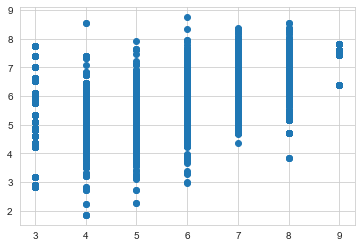

In [137]:
plt.scatter(ym1_test,predictions_m1)

**Residual Histogram**

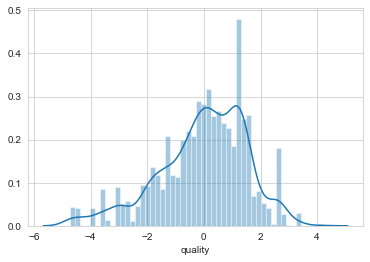

In [138]:
sns.distplot((ym1_test-predictions_m1),bins=50);

In [139]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym1_test, predictions_m1))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym1_test, predictions_m1))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym1_test, predictions_m1)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym1_test, predictions_m1))
print('Explained Variance:', metrics.explained_variance_score(ym1_test, predictions_m1))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym1_test, predictions_m1))
print('Median Absolute Error:', metrics.median_absolute_error(ym1_test, predictions_m1))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym1_test, predictions_m1))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym1_test, predictions_m1))



R-squared: 0.3908845706978429
Mean Squared Error (MSE): 2.4169008403411136
Root Mean Squared Error (RMSE): 1.55463849184983
Log Mean Squared Error: 0.06194175275763515
Explained Variance: 0.39112061620808347
Mean Absolute Error (MAE): 1.2133693682775692
Median Absolute Error: 1.0832340992302534
Poisson Deviance: 0.43022216816259595
Mean Gamma Deviance: 0.08109970582056264


## Model 2 -  Drop Density For High VIF

In [140]:
#Create y and X datasets for this model
ym2 = df.quality
Xm2 = df.drop(['quality','density'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm2_resampled, ym2_resampled = ros.fit_resample(Xm2, ym2)
from collections import Counter
print(sorted(Counter(ym2_resampled).items()))

from sklearn.model_selection import train_test_split
Xm2_train, Xm2_test, ym2_train, ym2_test = train_test_split(Xm2_resampled, ym2_resampled, test_size=0.25, random_state=101)
Xm2_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol
3593,5.6,0.28,0.28,4.2,0.044,52.0,158.0,3.35,0.44,10.7
7522,6.9,0.20,0.34,1.9,0.043,25.0,136.0,3.31,0.60,10.1
5072,6.9,0.39,0.40,4.6,0.022,5.0,19.0,3.31,0.37,12.6
6514,6.8,0.26,0.34,15.1,0.060,42.0,162.0,3.24,0.52,10.5
6587,7.1,0.49,0.22,2.0,0.047,146.5,307.5,3.24,0.37,11.0


In [141]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(Xm2_train,ym2_train)
print('Estimated intercept coefficient:',lm2.intercept_)
print ('Number of coefficients:', len(lm2.coef_))
coeffm2_df = pd.DataFrame(lm2.coef_,Xm2.columns,columns=['Coefficient'])
coeffm2_df

Estimated intercept coefficient: -7.305391948060693
Number of coefficients: 10


,Coefficient
fixed_acidity,0.016877
volatile_acidity,-3.215211
citric_acid,1.109478
residual_sugar,0.074732
chlorides,-4.520072
free_sulfur_dioxide,-0.000705
total_sulfur_dioxide,-0.002886
pH,1.668494
sulphates,0.975211
alcohol,0.750590


In [142]:
predictions_m2 = lm2.predict(Xm2_test)

**Predicted vs. Actual**

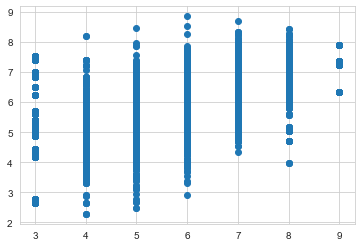

In [143]:
plt.scatter(ym2_test,predictions_m2)

**Residual Histogram**

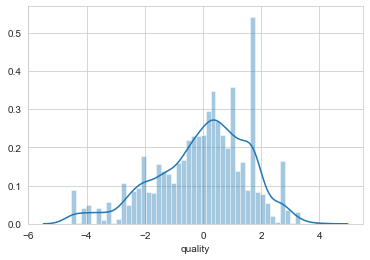

In [144]:
sns.distplot((ym2_test-predictions_m2),bins=50);

In [145]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym2_test, predictions_m2))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym2_test, predictions_m2))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym2_test, predictions_m2)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym2_test, predictions_m2))
print('Explained Variance:', metrics.explained_variance_score(ym2_test, predictions_m2))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym2_test, predictions_m2))
print('Median Absolute Error:', metrics.median_absolute_error(ym2_test, predictions_m2))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym2_test, predictions_m2))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym2_test, predictions_m2))



R-squared: 0.3533213247640833
Mean Squared Error (MSE): 2.56594753378517
Root Mean Squared Error (RMSE): 1.601857526056912
Log Mean Squared Error: 0.06502276283713321
Explained Variance: 0.3535719888014517
Mean Absolute Error (MAE): 1.272162539547054
Median Absolute Error: 1.0910909585961281
Poisson Deviance: 0.45429994720869576
Mean Gamma Deviance: 0.08500614797421308


In [146]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
ym2, Xm2 = dmatrices('quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vifm2 = pd.DataFrame()
vifm2['VIF'] = [variance_inflation_factor(Xm2.values, i) for i in range(Xm2.shape[1])]
vifm2['variable'] = Xm2.columns

#view VIF for each explanatory variable 
vifm2

,VIF,variable
0,1039.129803,Intercept
1,1.356128,fixed_acidity
2,1.128298,volatile_acidity
3,1.159884,citric_acid
4,1.435215,residual_sugar
5,1.203645,chlorides
6,1.744627,free_sulfur_dioxide
7,2.153170,total_sulfur_dioxide
8,1.330912,pH
9,1.056637,sulphates


## Backward Elimination Method to create subsequent models

## Model 3: Drop Total Sulfur Dioxide


In [147]:
#Create y and X datasets for this model
ym3 = df.quality
Xm3 = df.drop(['quality','density','total_sulfur_dioxide'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm3_resampled, ym3_resampled = ros.fit_resample(Xm3, ym3)
from collections import Counter
print(sorted(Counter(ym3_resampled).items()))

from sklearn.model_selection import train_test_split
Xm3_train, Xm3_test, ym3_train, ym3_test = train_test_split(Xm3_resampled, ym3_resampled, test_size=0.25, random_state=101)
Xm3_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,pH,sulphates,alcohol
3593,5.6,0.28,0.28,4.2,0.044,52.0,3.35,0.44,10.7
7522,6.9,0.20,0.34,1.9,0.043,25.0,3.31,0.60,10.1
5072,6.9,0.39,0.40,4.6,0.022,5.0,3.31,0.37,12.6
6514,6.8,0.26,0.34,15.1,0.060,42.0,3.24,0.52,10.5
6587,7.1,0.49,0.22,2.0,0.047,146.5,3.24,0.37,11.0


In [148]:
Xm3_train.shape

(11539, 9)

In [149]:
from sklearn.linear_model import LinearRegression
lm3 = LinearRegression()
lm3.fit(Xm3_train,ym3_train)
print('Estimated intercept coefficient:',lm3.intercept_)
print ('Number of coefficients:', len(lm3.coef_))
coeffm1_df = pd.DataFrame(lm3.coef_,Xm3.columns,columns=['Coefficient'])
coeffm1_df

Estimated intercept coefficient: -7.25898007296605
Number of coefficients: 9


,Coefficient
fixed_acidity,0.007068
volatile_acidity,-3.345001
citric_acid,1.060155
residual_sugar,0.068562
chlorides,-5.452046
free_sulfur_dioxide,-0.004282
pH,1.594650
sulphates,0.847347
alcohol,0.768206


In [150]:
predictions_m3 = lm3.predict(Xm3_test)

**Predicted vs. Actual**

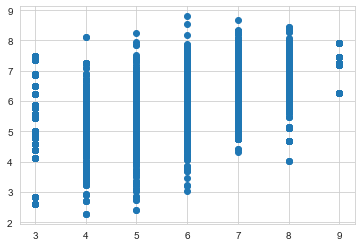

In [151]:
plt.scatter(ym3_test,predictions_m3)

**Residual Histogram**

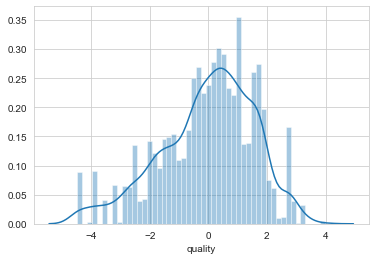

In [152]:
sns.distplot((ym3_test-predictions_m3),bins=50);

In [153]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym3_test, predictions_m3))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym3_test, predictions_m3))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym3_test, predictions_m3)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym3_test, predictions_m3))
print('Explained Variance:', metrics.explained_variance_score(ym3_test, predictions_m3))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym3_test, predictions_m3))
print('Median Absolute Error:', metrics.median_absolute_error(ym3_test, predictions_m3))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym3_test, predictions_m3))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym3_test, predictions_m3))



R-squared: 0.35062640430881375
Mean Squared Error (MSE): 2.5766406720635016
Root Mean Squared Error (RMSE): 1.6051917866920145
Log Mean Squared Error: 0.06535224915191208
Explained Variance: 0.3509444460932323
Mean Absolute Error (MAE): 1.2742284823867995
Median Absolute Error: 1.0756858092445167
Poisson Deviance: 0.45651035467654705
Mean Gamma Deviance: 0.08543596612765696


## Model 4: Drop Free Sulfur Dioxide

In [154]:
#Create y and X datasets for this model
ym4 = df.quality
Xm4 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm4_resampled, ym4_resampled = ros.fit_resample(Xm4, ym4)
from collections import Counter
print(sorted(Counter(ym4_resampled).items()))

from sklearn.model_selection import train_test_split
Xm4_train, Xm4_test, ym4_train, ym4_test = train_test_split(Xm4_resampled, ym4_resampled, test_size=0.25, random_state=101)
Xm4_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
3593,5.6,0.28,0.28,4.2,0.044,3.35,0.44,10.7
7522,6.9,0.20,0.34,1.9,0.043,3.31,0.60,10.1
5072,6.9,0.39,0.40,4.6,0.022,3.31,0.37,12.6
6514,6.8,0.26,0.34,15.1,0.060,3.24,0.52,10.5
6587,7.1,0.49,0.22,2.0,0.047,3.24,0.37,11.0


In [155]:
Xm4_train.shape

(11539, 8)

In [156]:
lm4 = LinearRegression()
lm4.fit(Xm4_train,ym4_train)
print('Estimated intercept coefficient:',lm4.intercept_)
print ('Number of coefficients:', len(lm4.coef_))
coeffm4_df = pd.DataFrame(lm4.coef_,Xm4.columns,columns=['Coefficient'])
coeffm4_df

Estimated intercept coefficient: -7.242513936902636
Number of coefficients: 8


,Coefficient
fixed_acidity,0.011333
volatile_acidity,-3.265816
citric_acid,1.126904
residual_sugar,0.065656
chlorides,-5.462121
pH,1.511280
sulphates,0.772280
alcohol,0.775110


In [157]:
predictions_m4 = lm4.predict(Xm4_test)

**Predicted vs. Actual**

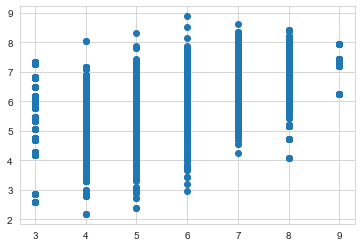

In [158]:
plt.scatter(ym1_test,predictions_m4)

**Residual Histogram**

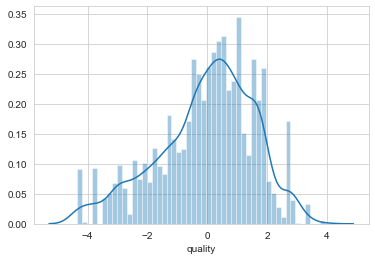

In [159]:
sns.distplot((ym4_test-predictions_m4),bins=50);

## Model 5: Drop Fixed Acidity


In [160]:
#Create y and X datasets for this model
ym5 = df.quality
Xm5 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm5_resampled, ym5_resampled = ros.fit_resample(Xm5, ym5)
from collections import Counter
print(sorted(Counter(ym5_resampled).items()))

from sklearn.model_selection import train_test_split
Xm5_train, Xm5_test, ym5_train, ym5_test = train_test_split(Xm5_resampled, ym5_resampled, test_size=0.25, random_state=101)
Xm5_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,citric_acid,residual_sugar,chlorides,pH,sulphates,alcohol
3593,0.28,0.28,4.2,0.044,3.35,0.44,10.7
7522,0.20,0.34,1.9,0.043,3.31,0.60,10.1
5072,0.39,0.40,4.6,0.022,3.31,0.37,12.6
6514,0.26,0.34,15.1,0.060,3.24,0.52,10.5
6587,0.49,0.22,2.0,0.047,3.24,0.37,11.0


In [161]:
Xm5_train.shape

(11539, 7)

In [162]:
from sklearn.linear_model import LinearRegression
lm5 = LinearRegression()
lm5.fit(Xm5_train,ym5_train)
print('Estimated intercept coefficient:',lm5.intercept_)
print ('Number of coefficients:', len(lm5.coef_))
coeffm5_df = pd.DataFrame(lm5.coef_,Xm5.columns,columns=['Coefficient'])
coeffm5_df

Estimated intercept coefficient: -7.049304201303739
Number of coefficients: 7


,Coefficient
volatile_acidity,-3.256105
citric_acid,1.159735
residual_sugar,0.065645
chlorides,-5.525584
pH,1.477257
sulphates,0.771052
alcohol,0.773768


In [163]:
predictions_m5 = lm5.predict(Xm5_test)

**Predicted vs. Actual**

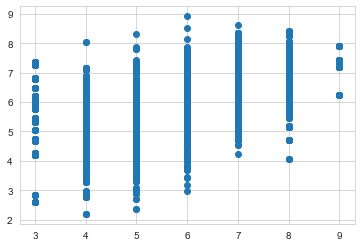

In [164]:
plt.scatter(ym5_test,predictions_m5)

**Residual Histogram**

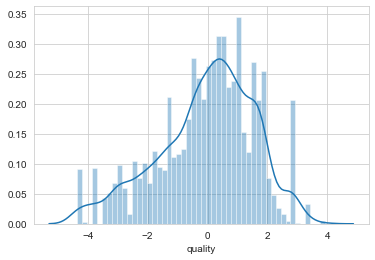

In [165]:
sns.distplot((ym5_test-predictions_m5),bins=50);

In [166]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym5_test, predictions_m5))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym5_test, predictions_m5))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym5_test, predictions_m5)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym5_test, predictions_m5))
print('Explained Variance:', metrics.explained_variance_score(ym5_test, predictions_m5))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym5_test, predictions_m5))
print('Median Absolute Error:', metrics.median_absolute_error(ym5_test, predictions_m5))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym5_test, predictions_m5))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym5_test, predictions_m5))



R-squared: 0.3431438278529918
Mean Squared Error (MSE): 2.606330685571634
Root Mean Squared Error (RMSE): 1.6144134184190968
Log Mean Squared Error: 0.06657453132675668
Explained Variance: 0.3435287510743147
Mean Absolute Error (MAE): 1.2785406533382124
Median Absolute Error: 1.0762124781127227
Poisson Deviance: 0.4633774288815949
Mean Gamma Deviance: 0.08690798010500408



## Model 6: Drop Residual Sugar



In [167]:
#Create y and X datasets for this model
ym6 = df.quality
Xm6 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm6_resampled, ym6_resampled = ros.fit_resample(Xm6, ym6)
from collections import Counter
print(sorted(Counter(ym6_resampled).items()))

from sklearn.model_selection import train_test_split
Xm6_train, Xm6_test, ym6_train, ym6_test = train_test_split(Xm6_resampled, ym6_resampled, test_size=0.25, random_state=101)
Xm6_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,citric_acid,chlorides,pH,sulphates,alcohol
3593,0.28,0.28,0.044,3.35,0.44,10.7
7522,0.20,0.34,0.043,3.31,0.60,10.1
5072,0.39,0.40,0.022,3.31,0.37,12.6
6514,0.26,0.34,0.060,3.24,0.52,10.5
6587,0.49,0.22,0.047,3.24,0.37,11.0


In [168]:
Xm6_train.shape

(11539, 6)

In [169]:
from sklearn.linear_model import LinearRegression
lm6 = LinearRegression()
lm6.fit(Xm6_train,ym6_train)
print('Estimated intercept coefficient:',lm6.intercept_)
print ('Number of coefficients:', len(lm6.coef_))
coeffm6_df = pd.DataFrame(lm6.coef_,Xm6.columns,columns=['Coefficient'])
coeffm6_df


Estimated intercept coefficient: -4.501747413793053
Number of coefficients: 6


,Coefficient
volatile_acidity,-3.259504
citric_acid,1.418942
chlorides,-5.641911
pH,1.048394
sulphates,0.851927
alcohol,0.689629


In [170]:
predictions_m6 = lm6.predict(Xm6_test)

**Predicted vs. Actual**

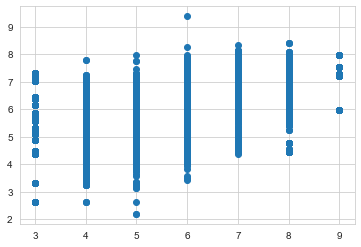

In [171]:
plt.scatter(ym6_test,predictions_m6)

**Residual Histogram**

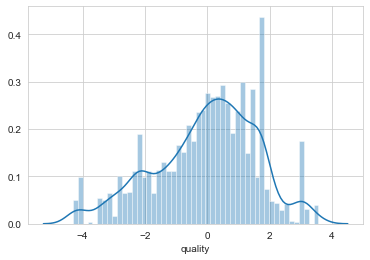

In [172]:
sns.distplot((ym6_test-predictions_m6),bins=50);

In [173]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym6_test, predictions_m6))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym6_test, predictions_m6))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym6_test, predictions_m6)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym6_test, predictions_m6))
print('Explained Variance:', metrics.explained_variance_score(ym6_test, predictions_m6))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym6_test, predictions_m6))
print('Median Absolute Error:', metrics.median_absolute_error(ym6_test, predictions_m6))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym6_test, predictions_m6))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym6_test, predictions_m6))



R-squared: 0.3229491486545355
Mean Squared Error (MSE): 2.686460878926096
Root Mean Squared Error (RMSE): 1.639042671478109
Log Mean Squared Error: 0.06823409129144711
Explained Variance: 0.32344044588143894
Mean Absolute Error (MAE): 1.3034636883235549
Median Absolute Error: 1.0473615561560834
Poisson Deviance: 0.47835009700158004
Mean Gamma Deviance: 0.08958291960219344


## Model 7: Drop Citric Acid

In [174]:
#Create y and X datasets for this model
ym7 = df.quality
Xm7 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm7_resampled, ym7_resampled = ros.fit_resample(Xm7, ym7)
from collections import Counter
print(sorted(Counter(ym1_resampled).items()))

from sklearn.model_selection import train_test_split
Xm7_train, Xm7_test, ym7_train, ym7_test = train_test_split(Xm7_resampled, ym7_resampled, test_size=0.25, random_state=101)
Xm7_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,chlorides,pH,sulphates,alcohol
3593,0.28,0.044,3.35,0.44,10.7
7522,0.20,0.043,3.31,0.60,10.1
5072,0.39,0.022,3.31,0.37,12.6
6514,0.26,0.060,3.24,0.52,10.5
6587,0.49,0.047,3.24,0.37,11.0


In [175]:
Xm7_train.shape

(11539, 5)

In [176]:
from sklearn.linear_model import LinearRegression
lm7 = LinearRegression()
lm7.fit(Xm7_train,ym7_train)
print('Estimated intercept coefficient:',lm7.intercept_)
print ('Number of coefficients:', len(lm7.coef_))
coeffm7_df = pd.DataFrame(lm7.coef_,Xm7.columns,columns=['Coefficient'])
coeffm7_df

Estimated intercept coefficient: -3.7137173402288344
Number of coefficients: 5


,Coefficient
volatile_acidity,-3.549275
chlorides,-5.041551
pH,0.916764
sulphates,0.876682
alcohol,0.704589


In [177]:
predictions_m7 = lm7.predict(Xm7_test)

**Predicted vs. Actual**

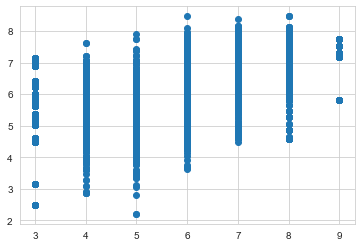

In [178]:
plt.scatter(ym7_test,predictions_m7)

**Residual Histogram**

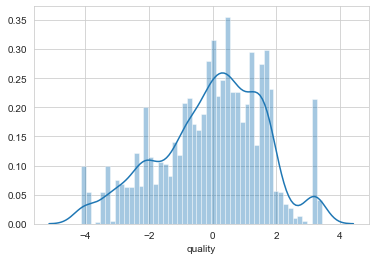

In [179]:
sns.distplot((ym7_test-predictions_m7),bins=50);

In [180]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym7_test, predictions_m7))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym7_test, predictions_m7))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym7_test, predictions_m7)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym7_test, predictions_m7))
print('Explained Variance:', metrics.explained_variance_score(ym7_test, predictions_m7))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym7_test, predictions_m7))
print('Median Absolute Error:', metrics.median_absolute_error(ym7_test, predictions_m7))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym7_test, predictions_m7))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym7_test, predictions_m7))


R-squared: 0.32016304217820923
Mean Squared Error (MSE): 2.6975158329791027
Root Mean Squared Error (RMSE): 1.6424115906127497
Log Mean Squared Error: 0.06845009084898229
Explained Variance: 0.320774537421059
Mean Absolute Error (MAE): 1.3096093915785079
Median Absolute Error: 1.1276465913067826
Poisson Deviance: 0.48030249744340725
Mean Gamma Deviance: 0.08990738663927031


## Model 8: Drop Alcohol

In [181]:
#Create y and X datasets for this model
ym8 = df.quality
Xm8 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm8_resampled, ym8_resampled = ros.fit_resample(Xm8, ym8)
from collections import Counter
print(sorted(Counter(ym8_resampled).items()))

from sklearn.model_selection import train_test_split
Xm8_train, Xm8_test, ym8_train, ym8_test = train_test_split(Xm8_resampled, ym8_resampled, test_size=0.25, random_state=101)
Xm8_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,chlorides,pH,sulphates
3593,0.28,0.044,3.35,0.44
7522,0.20,0.043,3.31,0.60
5072,0.39,0.022,3.31,0.37
6514,0.26,0.060,3.24,0.52
6587,0.49,0.047,3.24,0.37


In [182]:
Xm8_train.shape

(11539, 4)

In [183]:
from sklearn.linear_model import LinearRegression
lm8 = LinearRegression()
lm8.fit(Xm8_train,ym8_train)
print('Estimated intercept coefficient:',lm8.intercept_)
print ('Number of coefficients:', len(lm8.coef_))
coeffm8_df = pd.DataFrame(lm8.coef_,Xm8.columns,columns=['Coefficient'])
coeffm8_df

Estimated intercept coefficient: 1.3243363549419218
Number of coefficients: 4


,Coefficient
volatile_acidity,-2.502632
chlorides,-21.575816
pH,1.874638
sulphates,0.758594


In [184]:
predictions_m8 = lm8.predict(Xm8_test)

**Predicted vs. Actual**

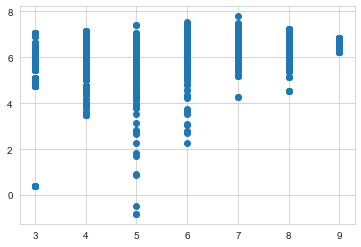

In [185]:
plt.scatter(ym8_test,predictions_m8)

**Residual Histogram**

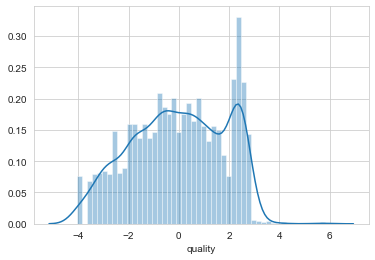

In [186]:
sns.distplot((ym8_test-predictions_m8),bins=50);

In [187]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym8_test, predictions_m8))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym8_test, predictions_m8))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym8_test, predictions_m8)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym8_test, predictions_m8))
print('Explained Variance:', metrics.explained_variance_score(ym8_test, predictions_m8))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym8_test, predictions_m8))
print('Median Absolute Error:', metrics.median_absolute_error(ym8_test, predictions_m8))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym8_test, predictions_m8))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym8_test, predictions_m8))


R-squared: 0.14810097420470036
Mean Squared Error (MSE): 3.380238575944975
Root Mean Squared Error (RMSE): 1.8385425140433862


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

## Model 9: Drop pH

In [188]:
#Create y and X datasets for this model
ym9 = df.quality
Xm9 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH'],axis=1)
#Balance data
ros = RandomOverSampler(random_state=42)
Xm9_resampled, ym9_resampled = ros.fit_resample(Xm9, ym9)
from collections import Counter
print(sorted(Counter(ym9_resampled).items()))

from sklearn.model_selection import train_test_split
Xm9_train, Xm9_test, ym9_train, ym9_test = train_test_split(Xm9_resampled, ym9_resampled, test_size=0.25, random_state=101)
Xm9_train.head()

[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,chlorides,sulphates
3593,0.28,0.044,0.44
7522,0.20,0.043,0.60
5072,0.39,0.022,0.37
6514,0.26,0.060,0.52
6587,0.49,0.047,0.37


In [189]:
Xm9_train.shape

(11539, 3)

In [190]:
from sklearn.linear_model import LinearRegression
lm9 = LinearRegression()
lm9.fit(Xm9_train,ym9_train)
print('Estimated intercept coefficient:',lm9.intercept_)
print ('Number of coefficients:', len(lm9.coef_))
coeffm9_df = pd.DataFrame(lm9.coef_,Xm9.columns,columns=['Coefficient'])
coeffm9_df


Estimated intercept coefficient: 7.225745215725491
Number of coefficients: 3


,Coefficient
volatile_acidity,-2.437782
chlorides,-24.768725
sulphates,1.244481


In [191]:
predictions_m9 = lm9.predict(Xm9_test)

**Predicted vs. Actual**

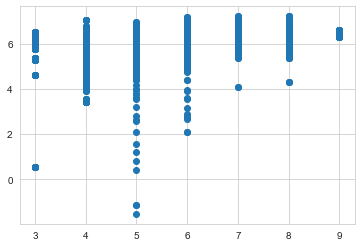

In [192]:
plt.scatter(ym9_test,predictions_m9)

**Residual Histogram**

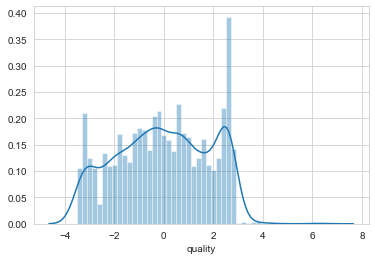

In [193]:
sns.distplot((ym9_test-predictions_m9),bins=50);

In [194]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym9_test, predictions_m9))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym9_test, predictions_m9))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym9_test, predictions_m9)))
print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym9_test, predictions_m9))
print('Explained Variance:', metrics.explained_variance_score(ym9_test, predictions_m9))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym9_test, predictions_m9))
print('Median Absolute Error:', metrics.median_absolute_error(ym9_test, predictions_m9))
print('Poisson Deviance:', metrics.mean_poisson_deviance(ym9_test, predictions_m9))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym9_test, predictions_m9))


R-squared: 0.1331937127521191
Mean Squared Error (MSE): 3.4393888962269714
Root Mean Squared Error (RMSE): 1.8545589492456074


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

## Model 10: Drop Sulphates

In [195]:
#Create y and X datasets for this model

ym10 = df.quality
Xm10 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates'],axis=1)

#Balance data
ros = RandomOverSampler(random_state=42)
Xm10_resampled, ym10_resampled = ros.fit_resample(Xm10, ym10)
from collections import Counter
print(sorted(Counter(ym10_resampled).items()))


from sklearn.model_selection import train_test_split
Xm10_train, Xm10_test, ym10_train, ym10_test = train_test_split(Xm10_resampled, ym10_resampled, test_size=0.25, random_state=101)
Xm10_train.head()


[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,volatile_acidity,chlorides
3593,0.28,0.044
7522,0.20,0.043
5072,0.39,0.022
6514,0.26,0.060
6587,0.49,0.047


In [196]:
Xm10_train.shape

(11539, 2)

In [197]:
from sklearn.linear_model import LinearRegression
lm10 = LinearRegression()
lm10.fit(Xm10_train,ym10_train)
print('Estimated intercept coefficient:',lm10.intercept_)
print ('Number of coefficients:', len(lm10.coef_))
coeffm10_df = pd.DataFrame(lm10.coef_,Xm10.columns,columns=['Coefficient'])
coeffm10_df

Estimated intercept coefficient: 7.80116263862391
Number of coefficients: 2


,Coefficient
volatile_acidity,-2.506057
chlorides,-23.751531


In [198]:
predictions_m10 = lm10.predict(Xm10_test)

**Predicted vs. Actual**

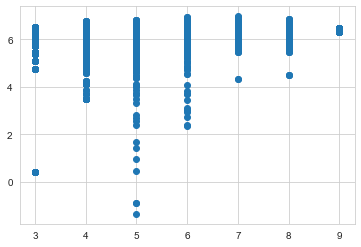

In [199]:
plt.scatter(ym10_test,predictions_m10)

**Residual Histogram**

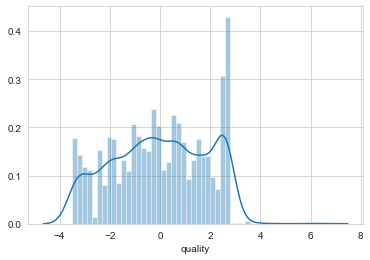

In [200]:
sns.distplot((ym10_test-predictions_m10),bins=50);

In [215]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym10_test, predictions_m10))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym10_test, predictions_m10))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym10_test, predictions_m10)))
#print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym10_test, predictions_m10))
print('Explained Variance:', metrics.explained_variance_score(ym10_test, predictions_m10))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym10_test, predictions_m10))
print('Median Absolute Error:', metrics.median_absolute_error(ym10_test, predictions_m10))
#print('Poisson Deviance:', metrics.mean_poisson_deviance(ym10_test, predictions_m10))
#print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym10_test, predictions_m10))


R-squared: 0.1273404292004945
Mean Squared Error (MSE): 3.4626140605458
Root Mean Squared Error (RMSE): 1.8608100549346245
Explained Variance: 0.12767726851340333
Mean Absolute Error (MAE): 1.5780951469287816
Median Absolute Error: 1.535981372138444


## Model 11: Drop Volatile Activity

In [216]:
#Create y and X datasets for this model
ym11 = df.quality
Xm11 = df.drop(['quality','density','total_sulfur_dioxide','free_sulfur_dioxide','fixed_acidity','residual_sugar','citric_acid','alcohol','pH','sulphates','volatile_acidity'],axis=1)

#Balance data
ros = RandomOverSampler(random_state=42)
Xm11_resampled, ym11_resampled = ros.fit_resample(Xm11, ym11)
from collections import Counter
print(sorted(Counter(ym11_resampled).items()))


from sklearn.model_selection import train_test_split
Xm11_train, Xm11_test, ym11_train, ym11_test = train_test_split(Xm11_resampled, ym11_resampled, test_size=0.25, random_state=101)
Xm11_train.head()


[(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]


,chlorides
3593,0.044
7522,0.043
5072,0.022
6514,0.060
6587,0.047


In [217]:
Xm11_train.shape

(11539, 1)

In [218]:
from sklearn.linear_model import LinearRegression
lm11 = LinearRegression()
lm11.fit(Xm11_train,ym11_train)
print('Estimated intercept coefficient:',lm11.intercept_)
print ('Number of coefficients:', len(lm11.coef_))
coeffm11_df = pd.DataFrame(lm11.coef_,Xm11.columns,columns=['Coefficient'])
coeffm11_df

Estimated intercept coefficient: 7.146363675365492
Number of coefficients: 1


,Coefficient
chlorides,-26.17467


In [219]:
predictions_m11 = lm11.predict(Xm11_test)

**Predicted vs. Actual**

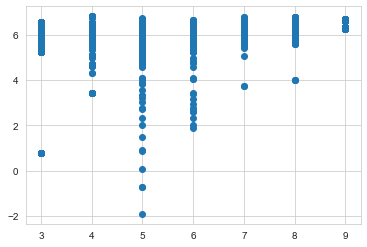

In [220]:
plt.scatter(ym11_test,predictions_m11)

**Residual Histogram**

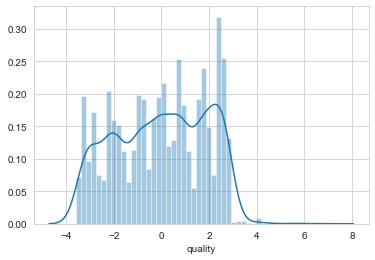

In [221]:
sns.distplot((ym11_test-predictions_m11),bins=50);

In [223]:
from sklearn import metrics
print('R-squared:', metrics.r2_score(ym11_test, predictions_m11))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(ym11_test, predictions_m11))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(ym11_test, predictions_m11)))
#print('Log Mean Squared Error:', metrics.mean_squared_log_error(ym11_test, predictions_m11))
print('Explained Variance:', metrics.explained_variance_score(ym11_test, predictions_m11))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(ym11_test, predictions_m11))
print('Median Absolute Error:', metrics.median_absolute_error(ym11_test, predictions_m11))
#print('Poisson Deviance:', metrics.mean_poisson_deviance(ym11_test, predictions_m11))
#print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(ym11_test, predictions_m11))


R-squared: 0.1019297193785973
Mean Squared Error (MSE): 3.5634408709790355
Root Mean Squared Error (RMSE): 1.8877078351744572
Explained Variance: 0.10217303651950271
Mean Absolute Error (MAE): 1.6141909278520343
Median Absolute Error: 1.6912257506384396
